In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
#Loading the Stock data
import google.colab
from google.colab import files
uploaded = files.upload()

Saving Historical Data.xlsx to Historical Data.xlsx


In [ ]:
#Loading the Data into a dataframe
df_new = pd.read_excel('Historical Data.xlsx')
df_new.head()

,Date,JKH,SPEN,ACL,AEL,COMB
0,2017-12-18,149.0,55.9,46.0,24.0,133.70
1,2017-12-19,147.8,55.9,45.0,23.5,132.14
2,2017-12-20,148.0,55.5,44.0,23.4,132.14
3,2017-12-21,147.6,55.5,44.5,23.5,132.14
4,2017-12-22,147.8,55.5,44.3,23.7,131.27


In [ ]:
df_new.dtypes

Date    datetime64[ns]
JKH            float64
SPEN           float64
ACL            float64
AEL            float64
COMB           float64
dtype: object

In [ ]:
df_new.Date = pd.to_datetime(df_new.Date)
df_new

,Date,JKH,SPEN,ACL,AEL,COMB
0,2017-12-18,149.0,55.9,46.0,24.0,133.70
1,2017-12-19,147.8,55.9,45.0,23.5,132.14
2,2017-12-20,148.0,55.5,44.0,23.4,132.14
3,2017-12-21,147.6,55.5,44.5,23.5,132.14
4,2017-12-22,147.8,55.5,44.3,23.7,131.27
...,...,...,...,...,...,...
670,2020-11-19,141.0,47.2,60.4,24.1,76.20
671,2020-11-20,141.6,47.3,62.0,24.5,76.30
672,2020-11-23,141.6,47.5,61.9,24.5,76.60
673,2020-11-24,145.5,47.2,62.5,24.3,76.60


In [ ]:
df_new.dtypes

Date    datetime64[ns]
JKH            float64
SPEN           float64
ACL            float64
AEL            float64
COMB           float64
dtype: object

In [ ]:
df_new = df_new.drop(columns=['Date'])
df_new

,JKH,SPEN,ACL,AEL,COMB
0,149.0,55.9,46.0,24.0,133.70
1,147.8,55.9,45.0,23.5,132.14
2,148.0,55.5,44.0,23.4,132.14
3,147.6,55.5,44.5,23.5,132.14
4,147.8,55.5,44.3,23.7,131.27
...,...,...,...,...,...
670,141.0,47.2,60.4,24.1,76.20
671,141.6,47.3,62.0,24.5,76.30
672,141.6,47.5,61.9,24.5,76.60
673,145.5,47.2,62.5,24.3,76.60


<function matplotlib.pyplot.show>

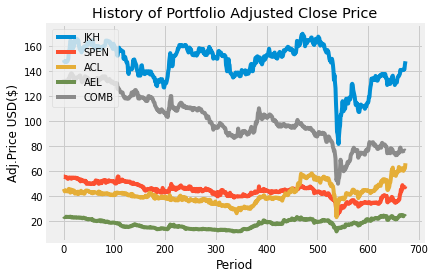

In [ ]:
#Visualization of Stock portfolio
title = 'History of Portfolio Adjusted Close Price'

opt_stocks = df_new

#Plotting the Graph
for c in opt_stocks.columns.values:
    plt.plot(opt_stocks[c], label = c)

plt. title(title)
plt.xlabel('Period',fontsize = 12)
plt.ylabel('Adj.Price USD($)', fontsize = 12)
plt.legend(opt_stocks.columns.values, loc = 'upper left')
plt.show

In [ ]:
#Showing the daily simple returns
returns = df_new.pct_change().apply(lambda x: np.log(1+x))
returns

,JKH,SPEN,ACL,AEL,COMB
0,NaN,NaN,NaN,NaN,NaN
1,-0.008086,0.000000,-0.021979,-0.021053,-0.011737
2,0.001352,-0.007181,-0.022473,-0.004264,0.000000
3,-0.002706,0.000000,0.011300,0.004264,0.000000
4,0.001354,0.000000,-0.004505,0.008475,-0.006606
...,...,...,...,...,...
670,0.000000,-0.006336,-0.021295,-0.028632,0.000000
671,0.004246,0.002116,0.026145,0.016461,0.001311
672,0.000000,0.004219,-0.001614,0.000000,0.003924
673,0.027170,-0.006336,0.009646,-0.008197,0.000000


In [ ]:
#Identifiaction of Individual Stock Performances
#Pre-requisites - Individual daily simple returns of each stock
JKH_returns = df_new['JKH'].pct_change().apply(lambda x: np.log(1+x))
SPEN_returns = df_new['SPEN'].pct_change().apply(lambda x: np.log(1+x))
ACL_returns = df_new['ACL'].pct_change().apply(lambda x: np.log(1+x))
AEL_returns = df_new['AEL'].pct_change().apply(lambda x: np.log(1+x))
COMB_returns = df_new['COMB'].pct_change().apply(lambda x: np.log(1+x))

In [ ]:
#Identification of Variance of each stock
#JKH
var_jkh = JKH_returns.var()

#SPEN
var_spen = SPEN_returns.var()

#ACL
var_acl = ACL_returns.var()

#AEL
var_ael = AEL_returns.var()

#COMB
var_comb = COMB_returns.var()

var_jkh, var_spen, var_acl, var_ael,var_comb

(0.0002695171447983252,
 0.0005488918525671364,
 0.0008633188680369504,
 0.0005150961943887253,
 0.00028551808230213544)

In [ ]:
annual_variance = df_new.pct_change().apply(lambda x: np.log(1+x)).var().apply(lambda x: x*(252))
annual_variance

JKH     0.067918
SPEN    0.138321
ACL     0.217556
AEL     0.129804
COMB    0.071951
dtype: float64

In [ ]:
#Identification of Volatility of each stock
annual_volatility = df_new.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(252))
annual_volatility

JKH     0.260611
SPEN    0.371915
ACL     0.466429
AEL     0.360284
COMB    0.268236
dtype: float64

In [ ]:
cov_matrix = returns.cov()
cov_matrix

,JKH,SPEN,ACL,AEL,COMB
JKH,0.000270,0.000131,0.000096,0.000133,0.000122
SPEN,0.000131,0.000549,0.000165,0.000189,0.000127
ACL,0.000096,0.000165,0.000863,0.000272,0.000161
AEL,0.000133,0.000189,0.000272,0.000515,0.000137
COMB,0.000122,0.000127,0.000161,0.000137,0.000286


In [ ]:
#The correlation Matrix
corr_matrix = returns.corr()
corr_matrix

,JKH,SPEN,ACL,AEL,COMB
JKH,1.000000,0.341158,0.198369,0.357421,0.439173
SPEN,0.341158,1.000000,0.239928,0.355864,0.322030
ACL,0.198369,0.239928,1.000000,0.407442,0.325141
AEL,0.357421,0.355864,0.407442,1.000000,0.358225
COMB,0.439173,0.322030,0.325141,0.358225,1.000000


In [ ]:
#Expected Returns of Stocks
# Identification of stock weights for allocation
w = [0.04688167, 0.02577105, -0.02869512, -0.00864402, 0.10701921]
expected_returns = returns.mean()*252
expected_returns

JKH    -0.002518
SPEN   -0.055412
ACL     0.137800
AEL    -0.001561
COMB   -0.209233
dtype: float64

In [ ]:
# Equally  weighted portfolio's variance
w = {'JKH': 0.04688167, 'SPEN': 0.02577105, 'ACL': -0.02869512, 'AEL':  -0.00864402, 'COMB': 0.10701921}
port_variance = cov_matrix.mul(w, axis=0).mul(w, axis=1).sum().sum()
port_variance

5.414280825434638e-06

In [ ]:
#Returns and Volatility of each stock
stocks = pd.concat([expected_returns, annual_volatility], axis=1)
stocks.columns = ['Returns', 'Volatility']
stocks

,Returns,Volatility
JKH,-0.002518,0.260611
SPEN,-0.055412,0.371915
ACL,0.137800,0.466429
AEL,-0.001561,0.360284
COMB,-0.209233,0.268236


In [ ]:
#Different portfolio weights and returns : Building a loop
#Creating empty data arrays for Portfolio Returns, volatility and Weights
port_returns = [] 
port_volatility = [] 
port_weights = [] 

#Defining the loop of running the portfolio weights
num_assets = len(df_new.columns)
num_portfolios = 2000

for portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    port_weights.append(weights)
    returns = np.dot(weights, expected_returns) 
    port_returns.append(returns)

    port_var = cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum() #Portfolio Variance
    port_sd = np.sqrt(port_var) # Daily standard deviation of the stocks
    ann_vol = port_sd*np.sqrt(252) # Annual volatility of the stocks
    port_volatility.append(ann_vol)

In [ ]:
#Creating a dataframe with Portfolio returns, volatility and individual random weights
datalot = {'New_Returns':port_returns, 'New_Volatility':port_volatility}

for counter, symbol in enumerate(df_new.columns.tolist()):
    #print(counter, symbol)
    datalot[symbol+' New_weight'] = [w[counter] for w in port_weights]

random_portfolios  = pd.DataFrame(datalot)
random_portfolios.head() 

,New_Returns,New_Volatility,JKH New_weight,SPEN New_weight,ACL New_weight,AEL New_weight,COMB New_weight
0,0.016746,0.263574,0.181715,0.279822,0.301917,0.195490,0.041056
1,-0.021035,0.250953,0.166867,0.375026,0.217999,0.098062,0.142047
2,0.034529,0.303390,0.142491,0.024202,0.515658,0.152325,0.165325
3,-0.003873,0.254357,0.230057,0.247976,0.108259,0.395289,0.018419
4,0.020518,0.267621,0.166549,0.195703,0.329258,0.245369,0.063121


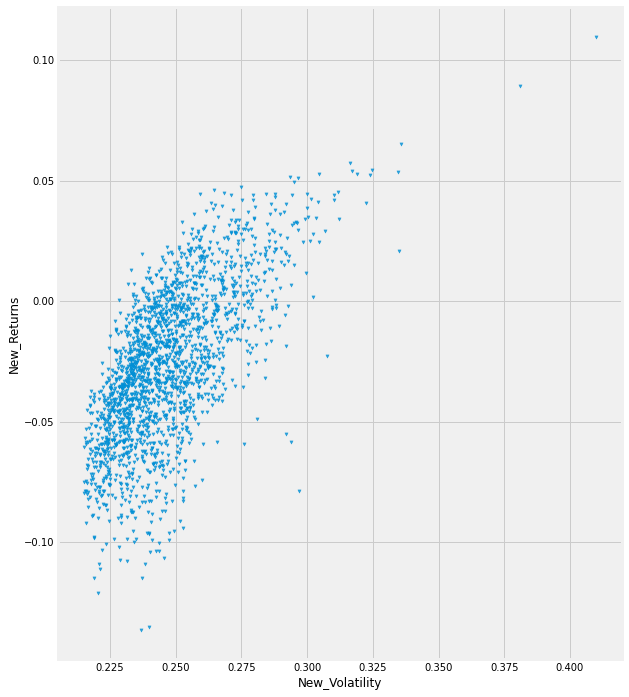

In [ ]:
# Plot efficient frontier
random_portfolios.plot.scatter(x='New_Volatility', y='New_Returns', marker='v', s=10, alpha=0.8, grid=True, figsize=[9,12])

In [ ]:
#Identification of the minimum volatility point (Left most point)
min_volalatility_portfolito = random_portfolios.iloc[random_portfolios['New_Volatility'].idxmin()]                               
min_volalatility_portfolito

New_Returns       -0.060387
New_Volatility     0.215131
JKH New_weight     0.435220
SPEN New_weight    0.066309
ACL New_weight     0.077486
AEL New_weight     0.104925
COMB New_weight    0.316061
Name: 270, dtype: float64

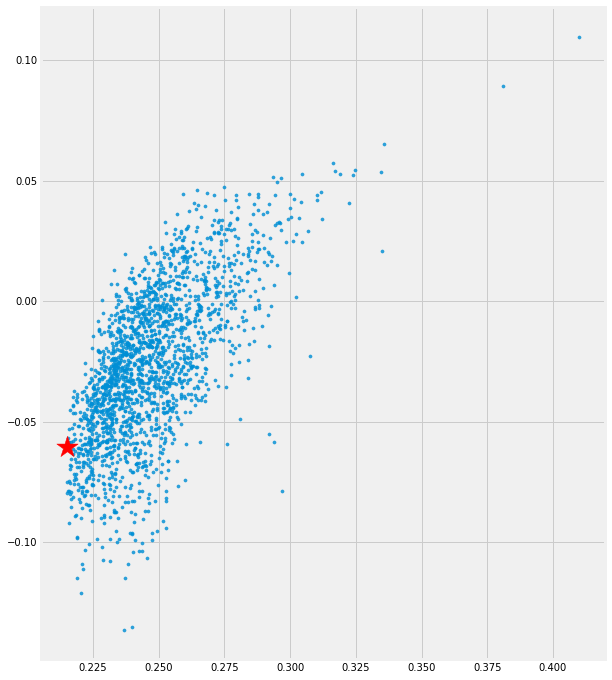

In [ ]:
# plotting the minimum volatility portfolio
plt.subplots(figsize=[9,12])
plt.scatter(random_portfolios['New_Volatility'], random_portfolios['New_Returns'],marker='o', s=10, alpha=0.8)
plt.scatter(min_volalatility_portfolito[1], min_volalatility_portfolito[0], color='r', marker='*', s=500)

In [ ]:
#Identification of the Optimal Risky Portfolio
risk_factor = 0.05 #The standard alpha value has been taken
optimal_risky_portfolio = random_portfolios.iloc[((random_portfolios['New_Returns']-risk_factor)/random_portfolios['New_Volatility']).idxmax()]
optimal_risky_portfolio

New_Returns        0.109780
New_Volatility     0.410018
JKH New_weight     0.008110
SPEN New_weight    0.048650
ACL New_weight     0.828049
AEL New_weight     0.108307
COMB New_weight    0.006884
Name: 1945, dtype: float64

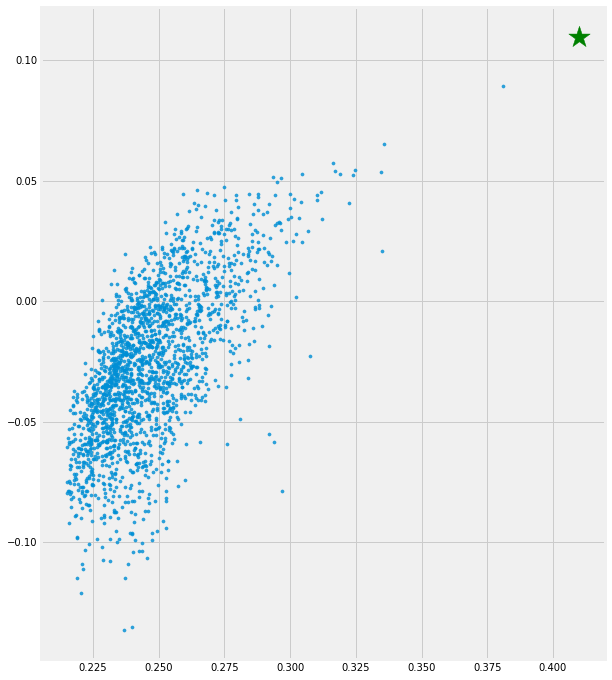

In [ ]:
# plotting the Highest portfolio point
plt.subplots(figsize=(9, 12))
plt.scatter(random_portfolios['New_Volatility'], random_portfolios['New_Returns'],marker='o', s=10, alpha=0.8)
plt.scatter(optimal_risky_portfolio[1], optimal_risky_portfolio[0], color='g', marker='*', s=500)

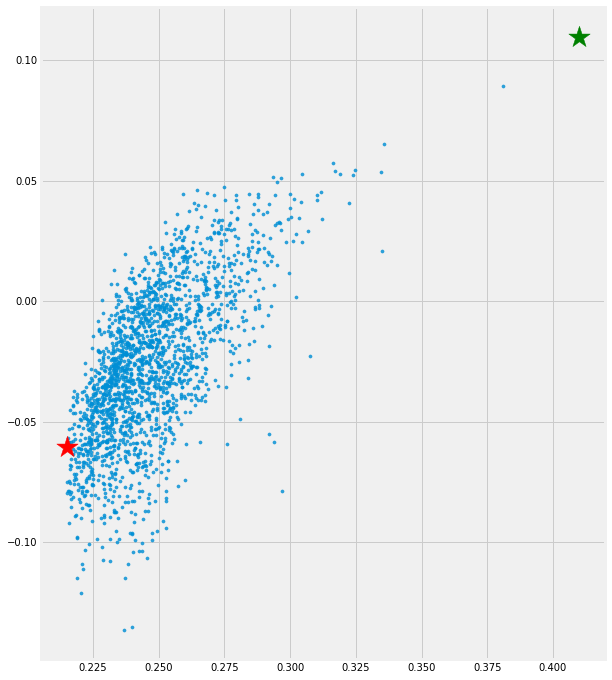

In [ ]:
# Plotting the optimal Portfolio for these stocks
plt.subplots(figsize=(9, 12))
plt.scatter(random_portfolios['New_Volatility'], random_portfolios['New_Returns'],marker='o', s=10, alpha=0.8)
plt.scatter(min_volalatility_portfolito[1], min_volalatility_portfolito[0], color='r', marker='*', s=500)
plt.scatter(optimal_risky_portfolio[1], optimal_risky_portfolio[0], color='g', marker='*', s=500)

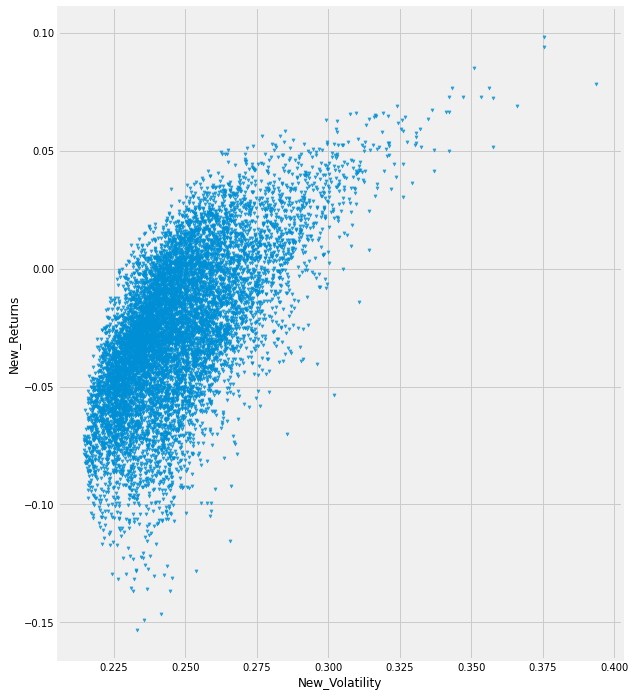

In [ ]:
#Different portfolio weights and returns : Building a loop
#Creating empty data arrays for Portfolio Returns, volatility and Weights
port_returns = [] 
port_volatility = [] 
port_weights = [] 

#Defining the loop of running the portfolio weights (Increased version)
num_assets = len(df_new.columns)
num_portfolios = 10000

for portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    port_weights.append(weights)
    returns = np.dot(weights, expected_returns) 
    port_returns.append(returns)

    port_var = cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum() #Portfolio Variance
    port_sd = np.sqrt(port_var) # Daily standard deviation of the stocks
    ann_vol = port_sd*np.sqrt(252) # Annual volatility of the stocks
    port_volatility.append(ann_vol)
    
#Creating a dataframe with Portfolio returns, volatility and individual random weights
datalot = {'New_Returns':port_returns, 'New_Volatility':port_volatility}

for counter, symbol in enumerate(df_new.columns.tolist()):
    #print(counter, symbol)
    datalot[symbol+' New_weight'] = [w[counter] for w in port_weights]

random_portfolios  = pd.DataFrame(datalot)
random_portfolios.plot.scatter(x='New_Volatility', y='New_Returns', marker='v', s=10, alpha=0.8, grid=True, figsize=[9,12])

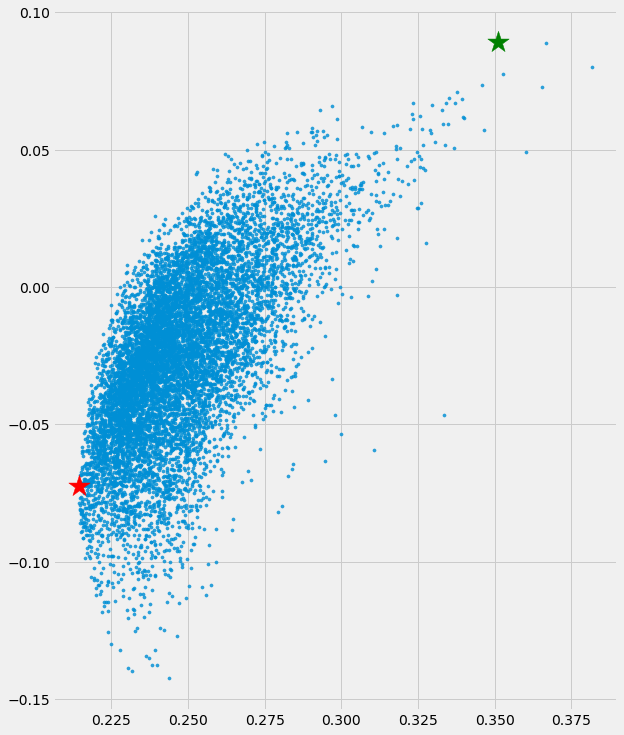

In [ ]:
risk_factor = 0.05 #The standard alpha value has been taken
optimal_risky_portfolio = random_portfolios.iloc[((random_portfolios['New_Returns']-risk_factor)/random_portfolios['New_Volatility']).idxmax()]
min_volalatility_portfolito = random_portfolios.iloc[random_portfolios['New_Volatility'].idxmin()]                               
plt.subplots(figsize=(9, 12))
plt.scatter(random_portfolios['New_Volatility'], random_portfolios['New_Returns'],marker='o', s=10, alpha=0.8)
plt.scatter(min_volalatility_portfolito[1], min_volalatility_portfolito[0], color='r', marker='*', s=500)
plt.scatter(optimal_risky_portfolio[1], optimal_risky_portfolio[0], color='g', marker='*', s=500)